# Matplotlib

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes. First, allow for interactive, cross-platform control of figures and plots, and second, to make it very easy to produce static raster or vector graphics files without the need for any GUIs. Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

## Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

As always, if you have a new and interesting plot that demonstrates a feature of Matplotlib, feel free to submit a concise, well-commented version of the code for inclusion in the gallery.

## Mailing Lists and StackOverflow
When you are just simply stuck, and cannot figure out how to get something to work, or just need some hints on how to get started, you will find much of the community at the matplotlib-users [mailing list](https://mail.python.org/mailman/listinfo/matplotlib-users). This mailing list is an excellent resource of information with many friendly members who just love to help out newcomers. The number one rule to remember with this list is to be persistant. While many questions do get answered fairly quickly, some do fall through the cracks, or the one person who knows the answer isn't available. Therefore, try again with your questions rephrased, or with a plot showing your attempts so far. We love plots, so an image showing what is wrong often gets the quickest responses.

Another community resource is [StackOverflow](http://stackoverflow.com/questions/tagged/matplotlib), so if you need to build up karma points, submit your questions here, and help others out too! We are also on [Gitter](https://gitter.im/matplotlib/matplotlib).

## Github repository
### Location
[Matplotlib](https://github.com/matplotlib) is hosted by GitHub.

### Bug Reports and feature requests
So, you think you found a bug? Or maybe you think some feature is just too difficult to use? Or missing altogether? Submit your bug reports [here](https://github.com/matplotlib/matplotlib/issues) at Matplotlib's issue tracker. We even have a process for submitting and discussing Matplotlib Enhancement Proposals ([MEPs](http://matplotlib.org/devdocs/devel/MEP/index.html)).

General Concepts
================

`matplotlib` has an extensive codebase that can be daunting to many
new users. However, most of matplotlib can be understood with a fairly
simple conceptual framework and knowledge of a few important points.

Plotting requires action on a range of levels, from the most general
(e.g., 'contour this 2-D array') to the most specific (e.g., 'color
this screen pixel red'). The purpose of a plotting package is to assist
you in visualizing your data as easily as possible, with all the necessary
control -- that is, by using relatively high-level commands most of
the time, and still have the ability to use the low-level commands when
needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top
of the hierarchy is the matplotlib "state-machine environment" which is
provided by the `matplotlib.pyplot` module. At this level, simple
functions are used to add plot elements (lines, images, text, etc.) to
the current axes in the current figure.

<div class="alert alert-info"><h4>Note</h4><p>Pyplot's state-machine environment behaves similarly to MATLAB and
   should be most familiar to users with MATLAB experience.</p></div>

The next level down in the hierarchy is the first level of the object-oriented
interface, in which pyplot is used only for a few functions such as figure
creation, and the user explicitly creates and keeps track of the figure
and axes objects. At this level, the user uses pyplot to create figures,
and through those figures, one or more axes objects can be created. These
axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding
matplotlib plots in GUI applications -- the pyplot level may be dropped
completely, leaving a purely object-oriented approach.



Backends
========


What is a backend?
------------------

A lot of documentation on the website and in the mailing lists refers
to the "backend" and many new users are confused by this term.
matplotlib targets many different use cases and output formats.  Some
people use matplotlib interactively from the python shell and have
plotting windows pop up when they type commands.  Some people embed
matplotlib into graphical user interfaces like wxpython or pygtk to
build rich applications.  Others use matplotlib in batch scripts to
generate postscript images from some numerical simulations, and still
others in web application servers to dynamically serve up graphs.

To support all of these use cases, matplotlib can target different
outputs, and each of these capabilities is called a `backend`; the
"frontend" is the user facing code, i.e., the plotting code, whereas the
"backend" does all the hard work behind-the-scenes to make the figure.
There are two types of backends: 
* user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends")
* hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

There are four ways to configure your backend. If they conflict each other,
the method mentioned last in the following list will be used, e.g. calling
`matplotlib.use()` will override the setting in your ``matplotlibrc``.


* The ``backend`` parameter in your ``matplotlibrc`` file:

       backend : WXAgg   # use wxpython with antigrain (agg) rendering

* Setting the `MPLBACKEND` environment
   variable, either for your current shell or for a single script:

        > export MPLBACKEND="module://my_backend"
        > python simple_plot.py

        > MPLBACKEND="module://my_backend" python simple_plot.py

   Setting this environment variable will override the ``backend`` parameter
   in *any* ``matplotlibrc``, even if there is a ``matplotlibrc`` in your
   current working directory. Therefore setting `MPLBACKEND`
   globally, e.g. in your ``.bashrc`` or ``.profile``, is discouraged as it
   might lead to counter-intuitive behavior.

* If your script depends on a specific backend you can use the
   `matplotlib.use` function:

      import matplotlib
      matplotlib.use('PS')   # generate postscript output by default

   If you use the `matplotlib.use` function, this must be done before
   importing `matplotlib.pyplot`. Calling `matplotlib.use` after
   pyplot has been imported will have no effect.  Using
   `matplotlib.use` will require changes in your code if users want to
   use a different backend.  Therefore, you should avoid explicitly calling
   `matplotlib.use` unless absolutely necessary.

<div class="alert alert-info"><h4>Note</h4><p>Backend name specifications are not case-sensitive; e.g., 'GTKAgg'
   and 'gtkagg' are equivalent.</p></div>

With a typical installation of matplotlib, such as from a
binary installer or a linux distribution package, a good default
backend will already be set, allowing both interactive work and
plotting from scripts, with output to the screen and/or to
a file, so at least initially you will not need to use any of the
methods given above.

If, however, you want to write graphical user interfaces, or a web
application server (`howto-webapp`), or need a better
understanding of what is going on, read on. To make things a little
more customizable for graphical user interfaces, matplotlib separates
the concept of the renderer (the thing that actually does the drawing)
from the canvas (the place where the drawing goes).  The canonical
renderer for user interfaces is ``Agg`` which uses the `Anti-Grain
Geometry` C++ library to make a raster (pixel) image of the figure.
All of the user interfaces except ``macosx`` can be used with
agg rendering, e.g.,
``WXAgg``, ``GTKAgg``, ``QT4Agg``, ``QT5Agg``, ``TkAgg``.  In
addition, some of the user interfaces support other rendering engines.
For example, with GTK, you can also select GDK rendering (backend
``GTK`` deprecated in 2.0) or Cairo rendering (backend ``GTKCairo``).

For the rendering engines, one can also distinguish between `vector
<https://en.wikipedia.org/wiki/Vector_graphics>` or `raster
<https://en.wikipedia.org/wiki/Raster_graphics>` renderers.  Vector
graphics languages issue drawing commands like "draw a line from this
point to this point" and hence are scale free, and raster backends
generate a pixel representation of the line whose accuracy depends on a
DPI setting.

Here is a summary of the matplotlib renderers (there is an eponymous
backed for each; these are *non-interactive backends*, capable of
writing to a file):

<pre>
=============   ============   ================================================
Renderer        Filetypes      Description
=============   ============   ================================================
`AGG`           `png`          `raster graphics` -- high quality images 
                                using the `Anti-Grain Geometry`_ engine
PS              `ps`           `vector graphics` -- Postscript_ output
                `eps`
PDF             `pdf`          `vector graphics` --
                               `Portable Document Format`_
SVG             `svg`          `vector graphics` --
                               `Scalable Vector Graphics`_
`Cairo`         `png`          `vector graphics` --
                `ps`           `Cairo graphics`_
                `pdf`
                `svg`
                ...
=============   ============   ================================================</pre>

And here are the user interfaces and renderer combinations supported;
these are *interactive backends*, capable of displaying to the screen
and of using appropriate renderers from the table above to write to
a file:

<pre>
============   ================================================================
Backend        Description
============   ================================================================
Qt5Agg         Agg rendering in a :term:`Qt5` canvas (requires PyQt5_).  This
               backend can be activated in IPython with ``%matplotlib qt5``.
ipympl         Agg rendering embedded in a Jupyter widget.  (requires ipympl)
               This can be enabled in a Jupyter notebook with
               ``%matplotlib ipympl``
GTK3Agg        Agg rendering to a :term:`GTK` 3.x canvas (requires PyGObject_
               and pycairo_ or cairocffi_)
               This backend can be activated in IPython with
               ``%matplotlib gtk3``.
macosx         Agg rendering into a Cocoa canvas in OSX.
               This backend can be activated in IPython with
               ``%matplotlib osx``.
TkAgg          Agg rendering to a :term:`Tk` canvas (requires TkInter_).
               This backend can be activated in IPython with
               ``%matplotlib tk``.
nbAgg          Embed an interactive figure in a Jupyter classic notebook.  This
               backend can be enabled in Jupyter notebooks via
               ``%matplotlib notebook``.
WebAgg         On ``show()`` will start a tornado server with an interactive
               figure.
GTK3Cairo      Cairo rendering to a :term:`GTK` 3.x canvas (requires PyGObject_
               and pycairo_ or cairocffi_)
Qt4Agg         Agg rendering to a :term:`Qt4` canvas (requires PyQt4_
               or ``pyside``).
               This backend can be activated in IPython with
               ``%matplotlib qt4``.
GTKAgg         Agg rendering to a :term:`GTK` 2.x canvas (requires PyGTK_ and
               pycairo_ or cairocffi_; Python2 only)
               This backend can be activated in IPython with
               ``%matplotlib gtk``.
GTKCairo       Cairo rendering to a :term:`GTK` 2.x canvas (requires PyGTK_
               and pycairo_ or cairocffi_; Python2 only)
WXAgg          Agg rendering to a :term:`wxWidgets` canvas
               (requires wxPython_.  v4.0 (in beta) is
               required for python3).
               This backend can be activated in IPython with
               ``%matplotlib wx``.
============   ================================================================
</pre>

In [1]:
import matplotlib

matplotlib.rcsetup.all_backends

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo',
 'agg',
 'cairo',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']

In [2]:
matplotlib.rcsetup.interactive_bk

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo']

In [3]:
matplotlib.rcsetup.non_interactive_bk

['agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

## What is the interactive mode?

Use of an interactive backend (see `what-is-a-backend`)
permits--but does not by itself require or ensure--plotting
to the screen.  Whether and when plotting to the screen occurs,
and whether a script or shell session continues after a plot
is drawn on the screen, depends on the functions and methods
that are called, and on a state variable that determines whether
matplotlib is in "interactive mode".  The default Boolean value is set
by the `matplotlibrc` file, and may be customized like any other
configuration parameter (see `sphx_glr_tutorials_introductory_customizing.py`).  It
may also be set via `matplotlib.interactive`, and its
value may be queried via `matplotlib.is_interactive`.  Turning
interactive mode on and off in the middle of a stream of plotting
commands, whether in a script or in a shell, is rarely needed
and potentially confusing, so in the following we will assume all
plotting is done with interactive mode either on or off.

Interactive mode may also be turned on via `matplotlib.pyplot.ion`, and turned off via `matplotlib.pyplot.ioff`.

#### Note 

Interactive mode works with suitable backends in ipython and in the ordinary python shell, but it does *not* work in the IDLE IDE. If the default backend does not support interactivity, an interactive backend can be explicitly activated using any of the methods discussed in `What is a backend?`

## Getting Started

In this tutorial, we'll use the following import statements. These abbreviations are semi-standardized, and most tutorials, other scientific python code that you'll find elsewhere will use them as well.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Figures
=================

![](images/anatomy.png)



`matplotlib.figure.Figure`
----------------------------------

The **whole** figure.  The figure keeps
track of all the children `~matplotlib.axes.Axes`, a smattering of
'special' artists (titles, figure legends, etc), and the **canvas**.
(Don't worry too much about the canvas, it is crucial as it is the
object that actually does the drawing to get you your plot, but as the
user it is more-or-less invisible to you).  A figure can have any
number of `~matplotlib.axes.Axes`, but to be useful should have
at least one.


Now let's create a figure...

In [5]:
fig = plt.figure(figsize=(9, 3))

<Figure size 900x300 with 0 Axes>

Awww, nothing happened! This is because by default mpl will not show anything until told to do so, as we mentioned earlier in the "backend" discussion.

Instead, we'll need to call ``plt.show()``

However, while we're on the topic, you can control the size of the figure through the ``figsize`` argument, which expects a tuple of ``(width, height)`` in inches. 

A really useful utility function is [`figaspect`](http://matplotlib.org/api/figure_api.html?highlight=figaspect#matplotlib.figure.figaspect)

In [6]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0))

<Figure size 400x800 with 0 Axes>

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

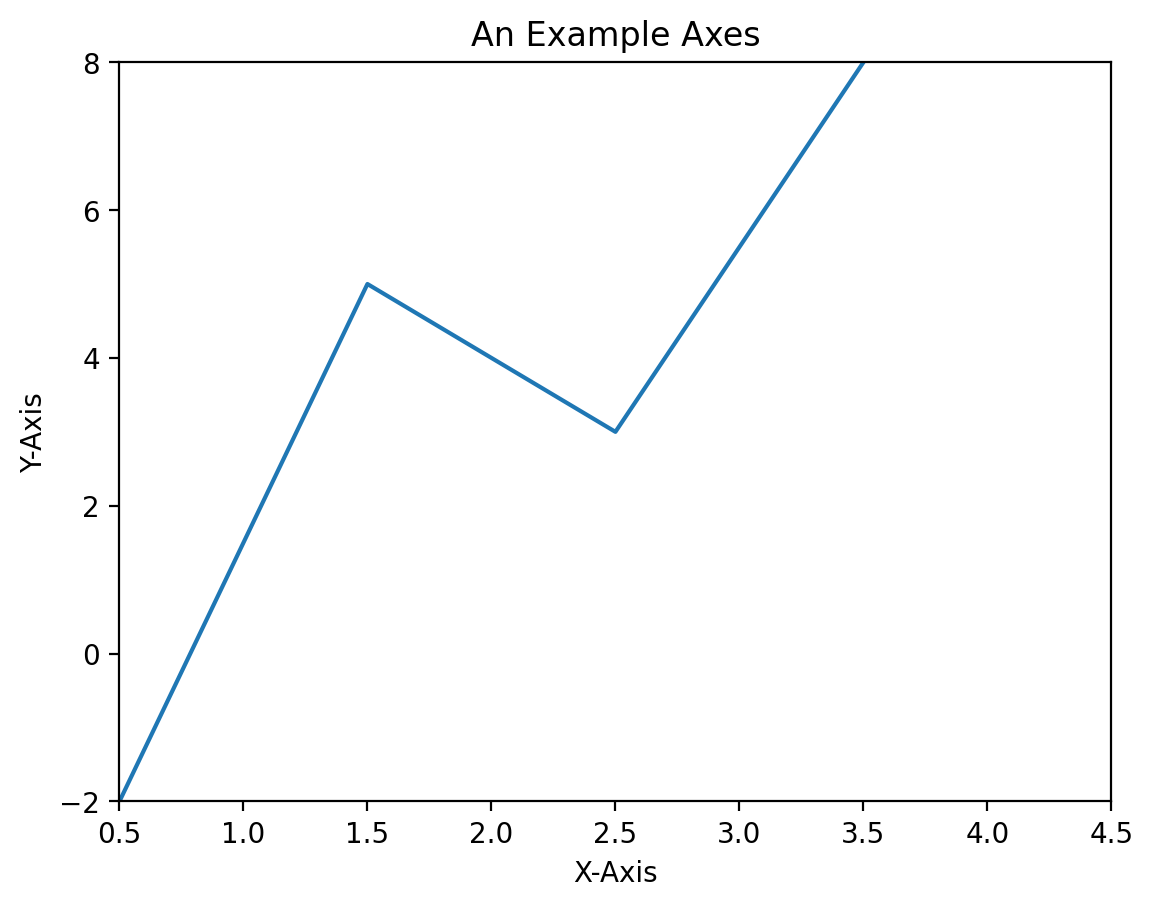

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
        ylabel='Y-Axis', xlabel='X-Axis')
ax.plot([0.5, 1.5, 2.5, 3.5], [-2,5,3,8])
plt.show()


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

In [8]:
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')

Text(0.5, 48.0, 'X-Axis')

Clearly this can get repitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

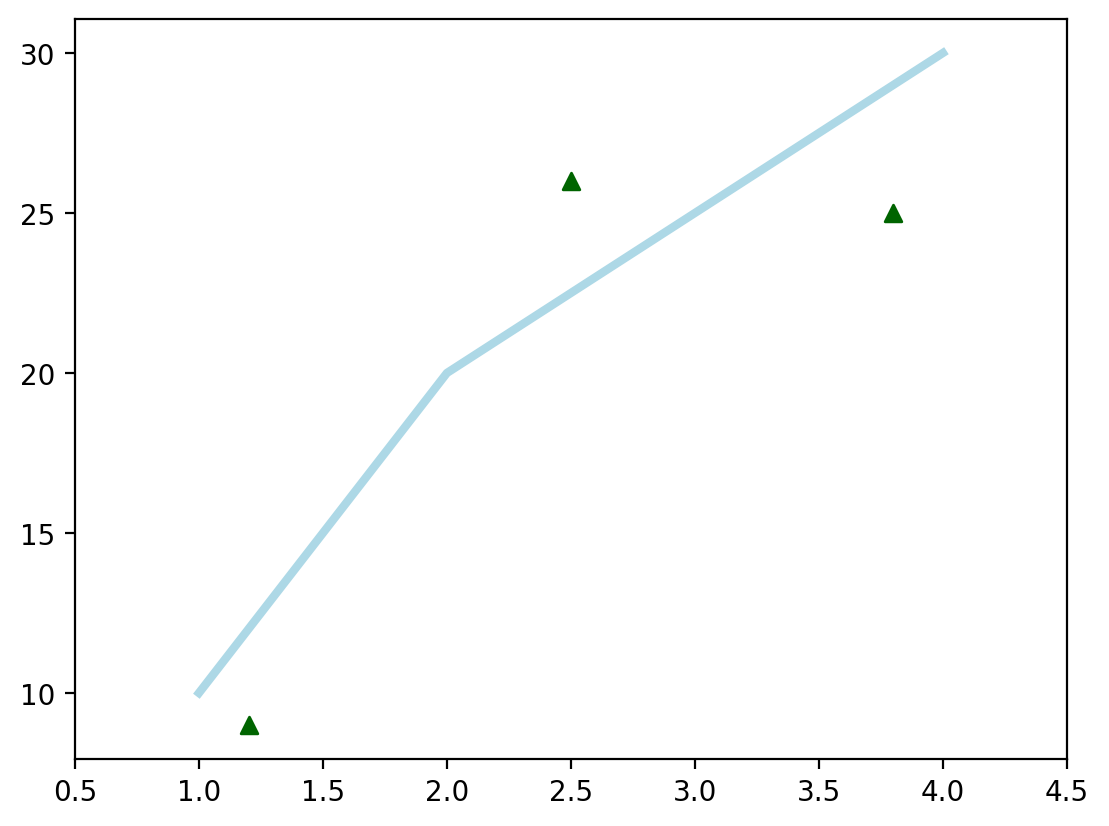

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

A note on the Object-Oriented API vs Pyplot
===========================================

Matplotlib has two interfaces. The first is an object-oriented (OO)
interface. In this case, we utilize an instance of `axes.Axes`
in order to render visualizations on an instance of `figure.Figure`.

The second is based on MATLAB and uses
a state-based interface. This is encapsulated in the `pyplot`
module. See the `pyplot tutorials <sphx_glr_tutorials_introductory_pyplot.py>`
for a more in-depth look at the pyplot interface.

Most of the terms are straightforward but the main thing to remember
is that:

* The Figure is the final image that may contain 1 or more Axes.
* The Axes represent an individual plot (don't confuse this with the word
  "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives
us much more flexibility and power in customizing our plot. See the
`object-oriented examples <api_examples>` for many examples of how
this approach is used.

<div class="alert alert-info"><h4>Note</h4><p>In general, try to use the object-oriented interface over the pyplot
   interface.</p></div>

## Axes methods vs. pyplot

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

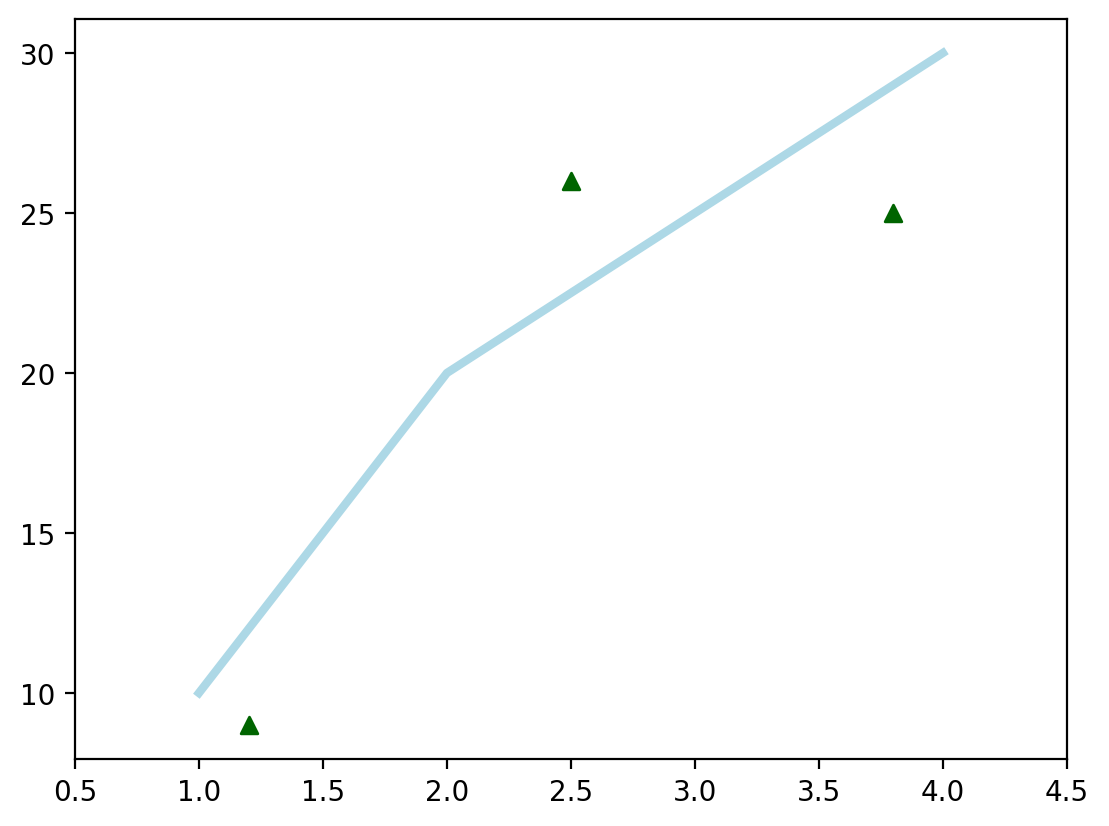

In [10]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

Much cleaner! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

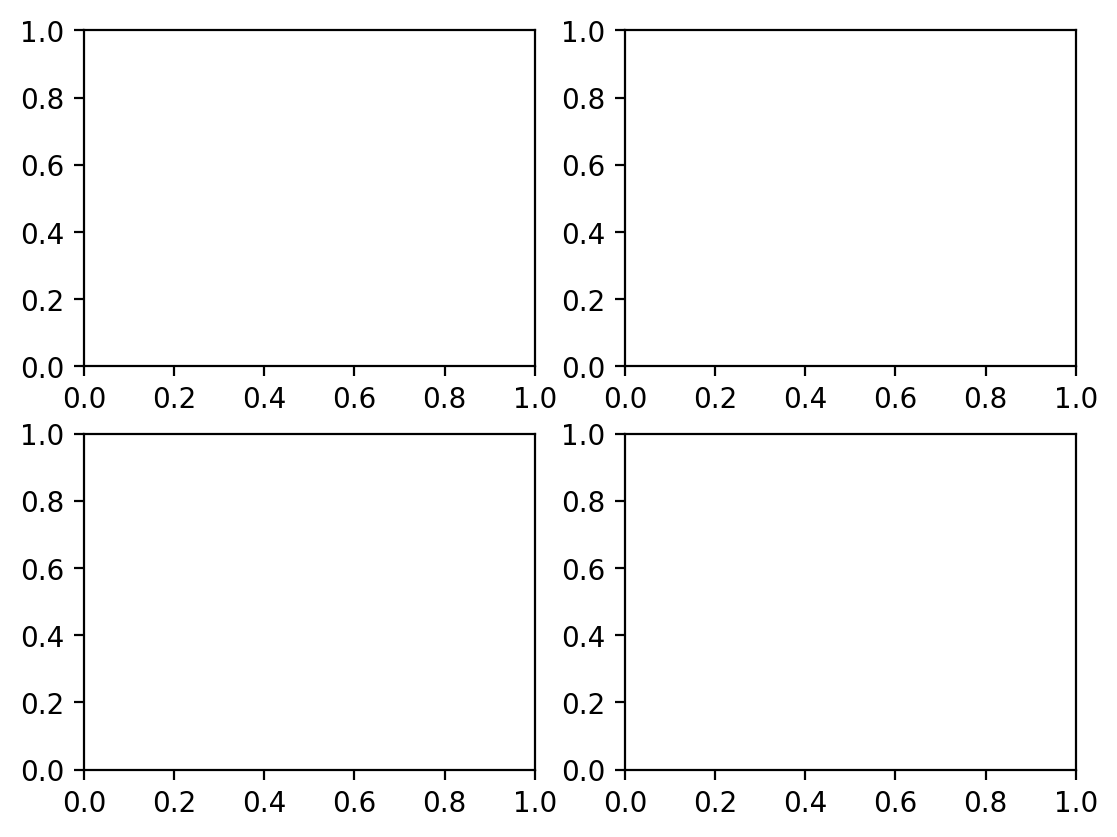

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

In [12]:
print(axes)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

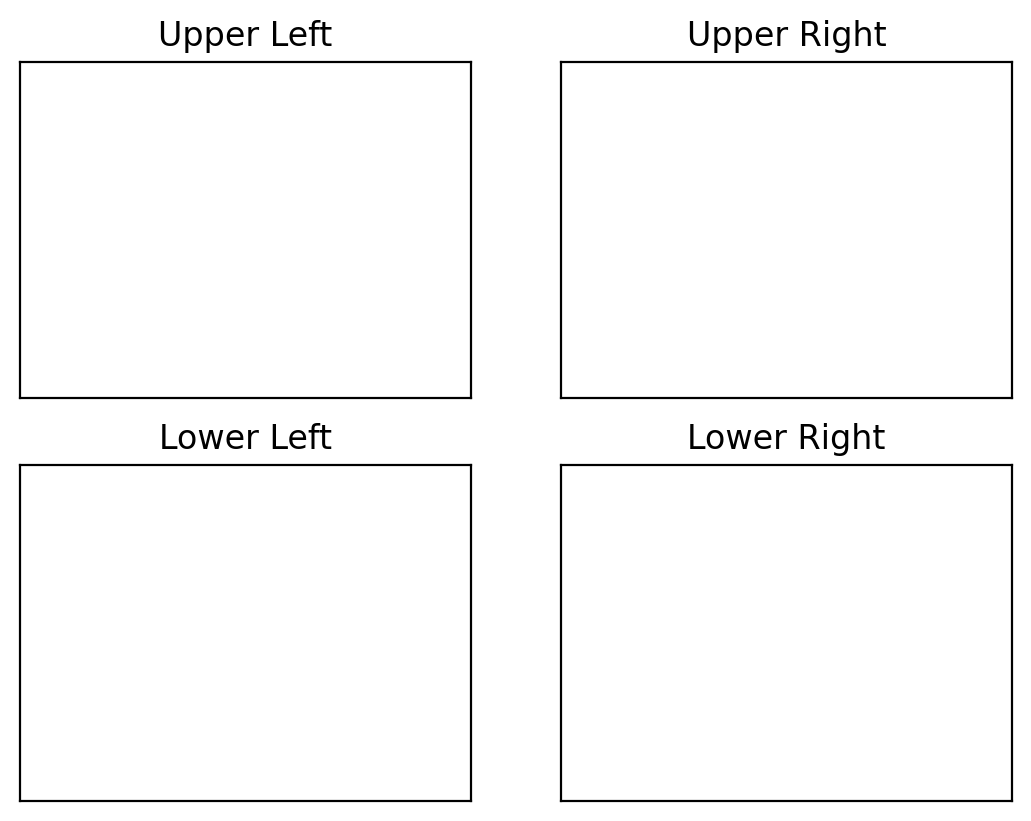

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

Simple example of multiple plots where each Axes shows a different plot:

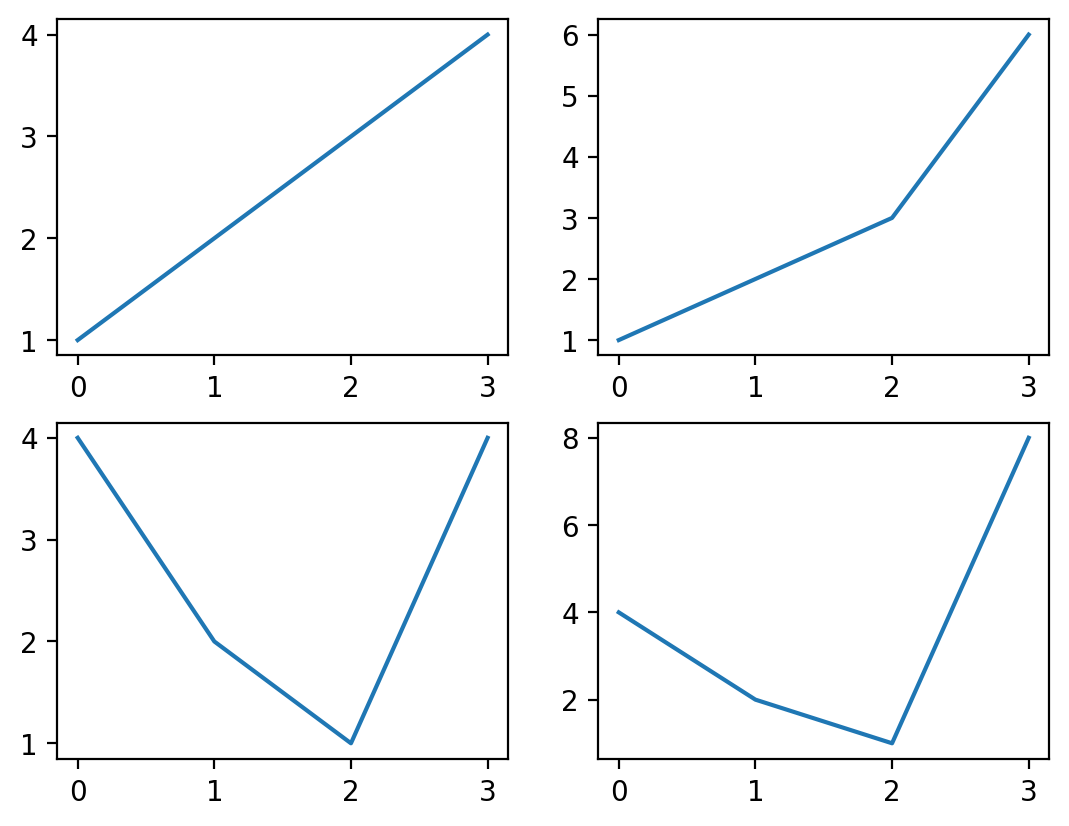

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].plot([1,2,3,4])
axes[1,0].plot([4,2,1,4])
axes[0,1].plot([1,2,3,6])
axes[1,1].plot([4,2,1,8])

plt.show()

Saving our plot
===============

Now that we're happy with the outcome of our plot, we want to save it to
disk. There are many file formats we can save to in Matplotlib. To see
a list of available options, use:



In [15]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


We can then use the :meth:`figure.Figure.savefig` in order to save the figure
to disk. Note that there are several useful flags we'll show below:

* ``transparent=True`` makes the background of the saved figure transparent
  if the format supports it.
* ``dpi=80`` controls the resolution (dots per square inch) of the output.
* ``bbox_inches="tight"`` fits the bounds of the figure to our plot.



In [16]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

Quick Exercise: Exercise 1.1
--------------

Let's use some of what we've been talking about.  Can you reproduce this figure?

<img src="images/exercise_1-1.png">

Here's the data and some code to get you started.

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'rossano',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [18]:
# %load exercises/1.1-subplots_and_basic_plotting.py

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?
